In [1]:
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

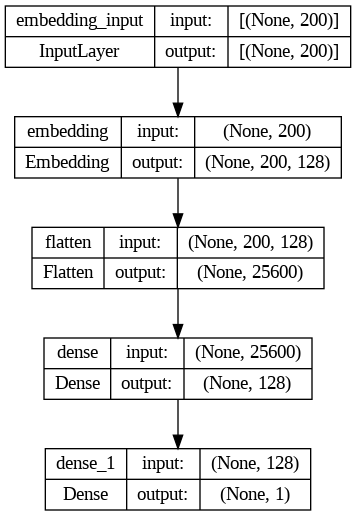

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 128)               3276928   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4557057 (17.38 MB)
Trainable params: 4557057 (17.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 18s 75ms/step - loss: 0.4287 - accuracy: 0.7803 - val_loss: 0.3076 - val_accuracy: 0.8675
Epoch 2/5
196/196 [==============================] - 10s 50ms/step - loss: 0.0879 - accuracy: 0.9705 - val_loss: 0.4082 - val_accuracy: 0.8496
Epoch 3/5
196/196 [==============================] - 6s 29ms/step - loss: 0.0085 - accuracy: 0.9986 - val_loss: 0.4533 - val_accuracy: 0.8610
Epoch 4/5
196/196 [==============================] - 5s 24ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4806 - val_accuracy: 0.8654
Epoch 5/5
196/196 [==============================] - 5s 24ms/step - loss: 4.6788e-04 - accuracy: 1.0000 - val_loss: 0.5020 - val_accuracy: 0.8661


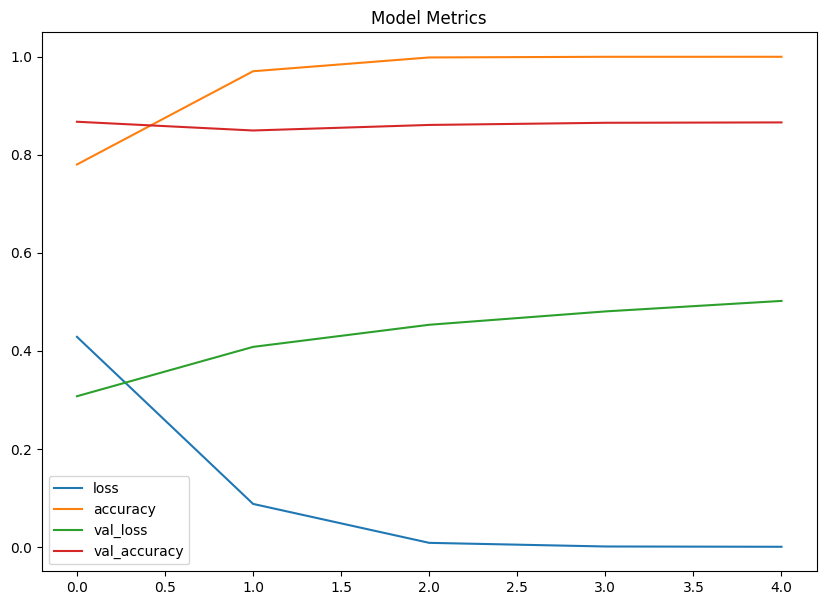

In [11]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 0.5020 - accuracy: 0.8661
Test Accuracy: 0.8661199808120728


In [13]:
y_pred = model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


In [16]:
y_pred

array([[4.4813273e-03],
       [9.9999833e-01],
       [3.5806501e-01],
       ...,
       [7.6598744e-03],
       [7.7849359e-04],
       [9.3456751e-01]], dtype=float32)

In [17]:
y_pred = y_pred.flatten()

In [19]:
y_pred

array([4.4813273e-03, 9.9999833e-01, 3.5806501e-01, ..., 7.6598744e-03,
       7.7849359e-04, 9.3456751e-01], dtype=float32)

In [20]:
y_pred = (y_pred > 0.5).astype(int)

In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



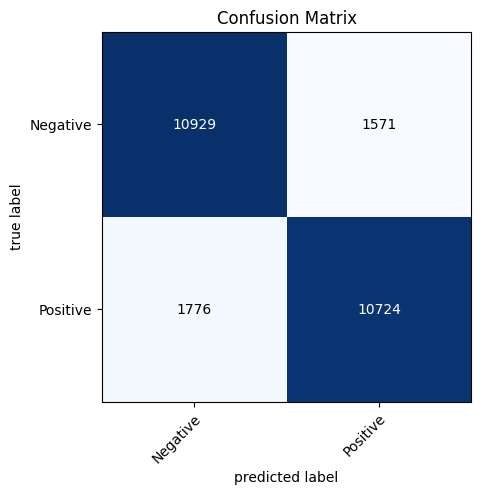

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()